| Parámetro | Significado                                              | Valor típico (Planck 2018) | Descripción física                                                                                                                            |
| --------- | -------------------------------------------------------- | -------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| `H0`      | Constante de Hubble hoy, en km/s/Mpc                     | 67.4                       | Determina la **tasa de expansión actual** del universo. Controla distancias angulares y edades.                                               |
| `ombh2`   | Densidad física de bariones: ( \Omega_b h^2 )            | 0.0224                     | Fija la cantidad de **materia bariónica** (átomos). Influye en la altura de los picos acústicos del CMB.                                      |
| `omch2`   | Densidad física de materia oscura fría: ( \Omega_c h^2 ) | 0.119                      | Controla la **cantidad de materia oscura fría (CDM)**. Modifica la amplitud y posición de los picos y el crecimiento de estructura.           |
| `omk`     | Curvatura espacial: ( \Omega_k = 1 - \Omega_\text{tot} ) | 0.0                        | Cero significa **universo plano**. Valores ≠ 0 cambian la geometría del CMB y las distancias comóviles.                                       |
| `tau`     | Profundidad óptica a la reionización                     | 0.056                      | Describe cuánta luz del CMB fue **re-espalzada por electrones libres** tras la reionización. Afecta el espectro (C_\ell^{EE}) a bajos (\ell). |
| Parámetro                | Significado                                          | Descripción física                                                                                                    |
| ------------------------ | ---------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| `mnu`                    | Suma total de masas de neutrinos (eV)                | Determina cómo los neutrinos suprimen potencia a escalas pequeñas (debido a su velocidad térmica). Ej: `mnu=0.06` eV. |
| `nnu`                    | Número efectivo total de especies de neutrinos       | Usualmente (N_\text{eff}=3.046). Si >3, implica radiación adicional (como neutrinos estériles o campos oscuros).      |
| `YHe`                    | Fracción de helio primordial                         | Controla el momento de recombinación; típicamente ~0.245.                                                             |
| `meffsterile`            | Masa efectiva de neutrino estéril (si `nnu` > 3.046) | Permite incluir especies exóticas.                                                                                    |
| `standard_neutrino_neff` | Valor base de ( N_\text{eff} ) estándar              | 3.046 (no suele cambiarse).                                                                                           |
    


| Parámetro | Afecta principalmente | Efecto observable                                                                              |
| --------- | --------------------- | ---------------------------------------------------------------------------------------------- |
| `H0`      | Distancias angulares  | Mueve la posición de los picos en (C_\ell^{TT}).                                               |
| `ombh2`   | Densidad bariónica    | Cambia la **altura relativa** de los picos acústicos (más bariones → picos impares más altos). |
| `omch2`   | Materia oscura        | Modifica el **crecimiento de perturbaciones** y la altura global de los picos.                 |
| `tau`     | Reionización          | Suprime (C_\ell^{TT}) a bajo (\ell) y aumenta (C_\ell^{EE}) a bajo (\ell).                     |
| `mnu`     | Neutrinos masivos     | Suprime (P(k)) a escalas pequeñas (efecto free-streaming).                                     |
| `nnu`     | Radiación adicional   | Desplaza los picos por cambio en la expansión temprana.                                        |


5667.901814903283


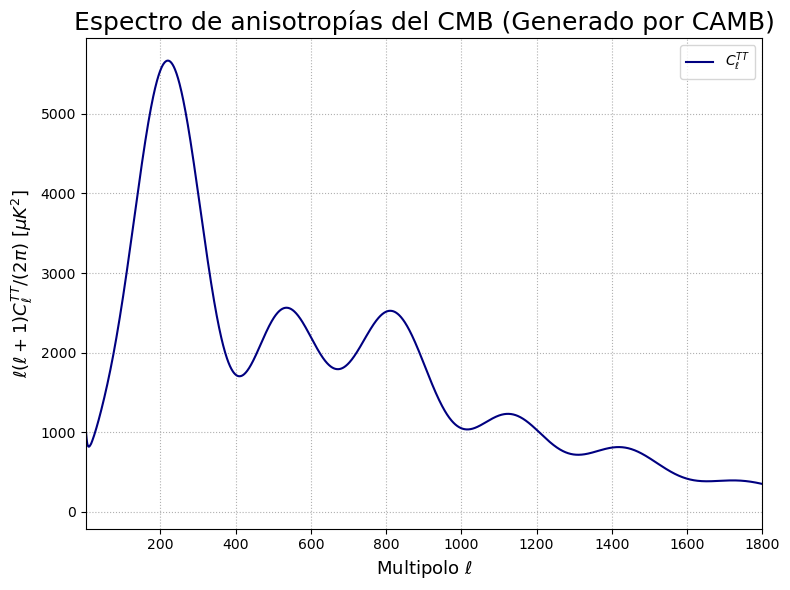

In [12]:
import camb
from camb import model, initialpower
import matplotlib.pyplot as plt
import numpy as np

# ================================
# 1. Parámetros cosmológicos base
# ================================
pars = camb.CAMBparams()

# Cosmología de referencia (Planck 2018)
pars.set_cosmology(H0=67.4, ombh2=0.0224, omch2=0.119, tau=0.056)
# --- HABILITAR MODO TENSORIAL ---
pars.WantTensors = True  # <==== IMPORTANTE
pars.InitPower.set_params(As=2.1e-9, ns=0.965, r=0.01)

# ================================
# 2. Configurar cálculos a realizar
# ================================
pars.set_for_lmax(2500, lens_potential_accuracy=1)

# ================================
# 3. Ejecutar CAMB
# ================================
results = camb.get_results(pars)

# ================================
# 4. Obtener espectros C_l
# ================================
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ell = np.arange(totCL.shape[0])
print(np.max(totCL))
# ================================
# 5. Graficar C_l^{TT}
# ================================
plt.figure(figsize=(8,6))
plt.plot(ell[2:], totCL[2:,0], color='navy', label=r'$C_\ell^{TT}$')
plt.xlabel(r'Multipolo $\ell$', fontsize=13)
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)\ [\mu K]$', fontsize=13)
plt.title('Espectro de anisotropías del CMB (Generado por CAMB)', fontsize=18)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlim(2, 1800)
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


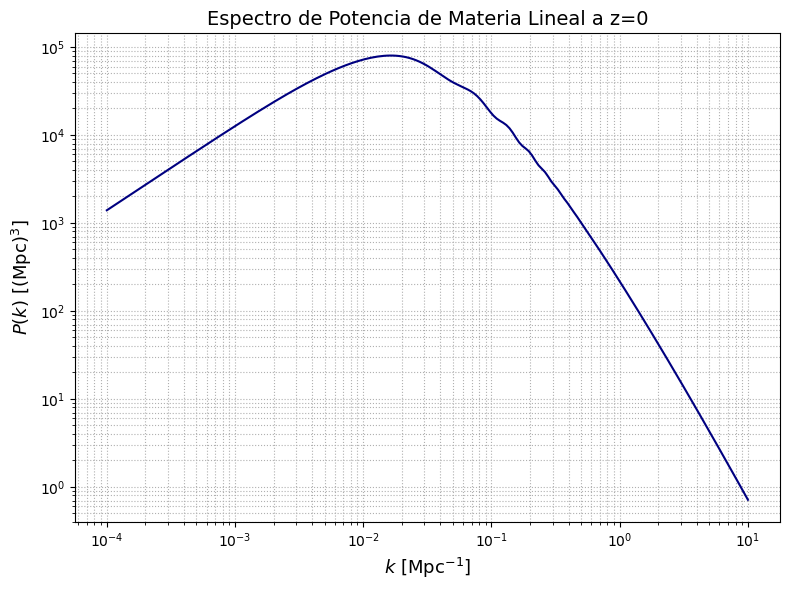

In [3]:
# Redefinir rango de escalas (Mpc^-1)
k = np.logspace(-4, 1, 200)
PK = camb.get_matter_power_interpolator(pars, nonlinear=False, hubble_units=False)
pk = [PK.P(0, kval) for kval in k]  # z=0, sin argumentos nombrados

# ================================
# 4. Graficar P(k)
# ================================
plt.figure(figsize=(8,6))
plt.loglog(k, pk, color='navy')
plt.xlabel(r'$k\ [\mathrm{Mpc}^{-1}]$', fontsize=13)
plt.ylabel(r'$P(k)\ [(\mathrm{Mpc})^3]$', fontsize=13)
plt.title('Espectro de Potencia de Materia Lineal a z=0', fontsize=14)
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


**Clave - Significado -	Valor típico**
---

'rstar'	Radio del horizonte sonoro en recombinación (Mpc)	~144 Mpc

'zstar'	Redshift del último scattering	~1090

'thetastar'	Ángulo subtendido por el horizonte en recombinación	~1.04×10⁻²

'age'	Edad del universo (Gyr)	~13.8 Gyr

'zdrag'	Redshift de desacoplamiento bariónico	~1059

'rdrag'	Escala de BAO (Mpc)	~147 Mpc

In [4]:
# Distancia angular al último scattering
DA = results.angular_diameter_distance(1090)
# Horizonte sonoro
rs = results.get_derived_params()['rstar']
# Constantes cosmológicas derivadas
params = results.get_derived_params()
for key, value in params.items():
    print(f'{key}: {value:.3f}')


age: 13.820
zstar: 1089.813
rstar: 144.676
thetastar: 1.040
DAstar: 13.909
zdrag: 1059.945
rdrag: 147.333
kd: 0.141
thetad: 0.161
zeq: 3379.689
keq: 0.010
thetaeq: 0.817
thetarseq: 0.451


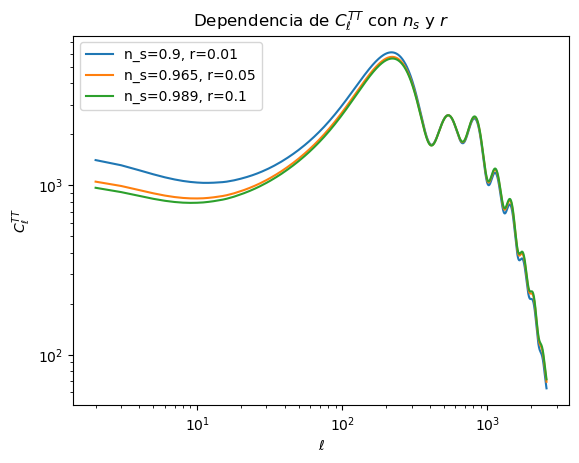

In [6]:
for ns, r in [(0.9,0.01),(0.965,0.05),(0.989,0.10)]:
    pars.InitPower.set_params(As=2.1e-9, ns=ns, r=r)
    results = camb.get_results(pars)
    cl = results.get_cmb_power_spectra(pars, CMB_unit='muK')['total'][:,0]
    plt.loglog(ell[2:], cl[2:], label=f'n_s={ns}, r={r}')
plt.legend()
plt.xlabel(r'$\ell$'); plt.ylabel(r'$C_\ell^{TT}$')
plt.title('Dependencia de $C_\ell^{TT}$ con $n_s$ y $r$')
plt.show()